In [3]:
import numpy as np
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.layers import BatchNormalization, Activation
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
data = []
labels = []
cur_path = os.getcwd() 
train_path = os.path.join(cur_path,'train_data')

classes = len(os.listdir(train_path))

for c in os.listdir(train_path): 
  path = os. path.join(train_path, c, 'augmented_data')
  images = os.listdir(path) 
  for a in images: 
    try: 
        image = Image.open(path + '\\' + a)
        image = image.resize((64,64)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(c) 
    except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)


In [6]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

print(data.shape, labels.shape)

(21694, 64, 64) (21694,)


In [7]:
# Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=classes)

print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
#y_t1 = to_categorical(y_t1, classes+1)
#y_t2 = to_categorical(y_t2, classes+1)


(17355, 64, 64) (4339, 64, 64) (17355,) (4339,)


In [26]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(64, 64, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(classes, activation='softmax'))

# Compilation of the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
anc = model.fit(X_t1, y_t1, batch_size=64, epochs=10, validation_data=(X_t2, y_t2))


Epoch 1/10
272/272 [==============================] - 119s 434ms/step - loss: 1.6862 - accuracy: 0.5431 - val_loss: 1.3136 - val_accuracy: 0.6114
Epoch 2/10
272/272 [==============================] - 118s 434ms/step - loss: 0.7110 - accuracy: 0.7904 - val_loss: 0.5794 - val_accuracy: 0.8149
Epoch 3/10
272/272 [==============================] - 118s 434ms/step - loss: 0.4019 - accuracy: 0.8835 - val_loss: 0.4312 - val_accuracy: 0.8550
Epoch 4/10
272/272 [==============================] - 118s 433ms/step - loss: 0.2496 - accuracy: 0.9291 - val_loss: 0.3569 - val_accuracy: 0.8829
Epoch 5/10
272/272 [==============================] - 118s 435ms/step - loss: 0.1605 - accuracy: 0.9574 - val_loss: 0.2811 - val_accuracy: 0.9076
Epoch 6/10
272/272 [==============================] - 124s 454ms/step - loss: 0.1142 - accuracy: 0.9695 - val_loss: 0.2587 - val_accuracy: 0.9182
Epoch 7/10
272/272 [==============================] - 124s 455ms/step - loss: 0.0892 - accuracy: 0.9772 - val_loss: 0.2336 -

In [28]:
# Save model
model.save("../script/traffic_signs.h5")

In [29]:
import joblib

# Save the label encoder object
joblib.dump(label_encoder, '../script/label_encoder.pkl')

['../script/label_encoder.pkl']

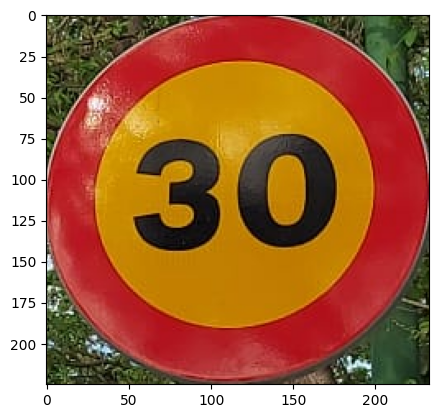

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../script/images2/doble1.jpg',cv.IMREAD_COLOR)

h_inf_1=170
h_sup_1=180
h_inf_2=0
h_sup_2=5

lower_red_1 = np.array([h_inf_1,50,50])
upper_red_1 = np.array([h_sup_1,255,255])
lower_red_2 = np.array([h_inf_2,50,50])
upper_red_2 = np.array([h_sup_2,255,255])

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
red_mask_1 = cv.inRange(hsv, lower_red_1, upper_red_1)
red_mask_2 = cv.inRange(hsv, lower_red_2, upper_red_2)

red_mask = red_mask_1+red_mask_2

img_rojo = cv.bitwise_and(img,img, mask= red_mask)

gray = cv.cvtColor(img_rojo, cv.COLOR_BGR2GRAY)
binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)[1]

forms = cv.erode(binary, np.ones((3,3),np.uint8), iterations = 1)

contours = cv.findContours(forms, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours[0], key=cv.contourArea)

img_copy = img.copy()
x,y,w,h = cv.boundingRect(biggest_contour)
cv.drawContours(img_copy, biggest_contour, -1, (0,255,0), 3)
cv.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)

cropped = img[y:y+h, x:x+w]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

1/1 [==============================] - 0s 102ms/step
Predicted class: velocidad_50
Class probability: 0.60645735


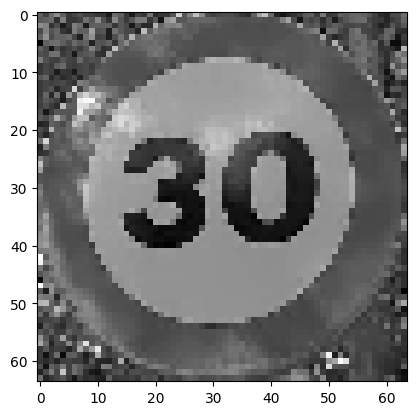

In [31]:
# Prepare the image
image = cv.resize(cropped, (64,64))
# Convert to grayscale
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = np.array(image)
image = image.reshape(1,64,64,1)

#show image
plt.imshow(image.reshape(64,64), cmap='gray')

# Make predictions
predictions = model.predict(image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
class_probability = np.max(predictions)

# Get prediction probability



predicted_class_label = label_encoder.inverse_transform([predicted_class_index])

# Print the predicted class label
print("Predicted class:", predicted_class_label[0])
print("Class probability:", class_probability)